<a href="https://colab.research.google.com/github/chloe-nguyenminh/Movie_Genre_Detector_Project/blob/main/base_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from keras import models
from keras import layers
from keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean

In [ ]:
from tensorflow.keras import utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_Train = np.load('/content/drive/MyDrive/Summer_2023/Models/Poster_Models/X_Train.npy', mmap_mode = 'r')
Y_Train = np.load('/content/drive/MyDrive/Summer_2023/Models/Poster_Models/Y_Train.npy', mmap_mode = 'r')

In [ ]:
X_Val = np.load('/content/drive/MyDrive/Summer_2023/Models/Poster_Models/X_Val.npy', mmap_mode = 'r')
Y_Val = np.load('/content/drive/MyDrive/Summer_2023/Models/Poster_Models/Y_Val.npy', mmap_mode = 'r')


In [ ]:
print(X_Val.shape)
print(Y_Val.shape)
print(X_Train.shape)
print(Y_Train.shape)


(9386, 200, 150, 3)
(9386, 28)
(24335, 200, 150, 3)
(24335, 28)


In [ ]:
num_classes = 28

In [ ]:
def load_data(x_train, y_train,idx,
              batch_size):
    x_batch = x_train[idx*batch_size : idx*batch_size + batch_size]
    y_batch = y_train[idx*batch_size : idx*batch_size + batch_size]

    return x_batch, y_batch

In [ ]:
def batch_generator(x_train, y_train,batch_size,
                    steps):
    idx=1
    while True:
        yield load_data(x_train, y_train,idx-1,batch_size)
        if idx<steps:
            idx+=1
        else:
            idx=1

In [ ]:
batch_size = 64
nb_epoch = 30
steps_per_epoch = np.ceil(X_Train.shape[0]/batch_size)
validation_steps = np.ceil(X_Val.shape[0]/batch_size)
print(steps_per_epoch)
print(validation_steps)

381.0
147.0


In [ ]:
training_batch_generator = batch_generator(X_Train, Y_Train, batch_size, steps_per_epoch)
validation_batch_generator = batch_generator(X_Val, Y_Val, batch_size, validation_steps)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(training_batch_generator,
epochs=nb_epoch,steps_per_epoch=steps_per_epoch,
 verbose=1, validation_data=validation_batch_generator,
validation_steps=validation_steps)
model.save('/content/drive/MyDrive/Summer_2023/Models/Poster_Models/base-cnn-model.h5')

Epoch 1/30
381/381 [==============================] - 426s 1s/step - loss: 0.2781 - accuracy: 0.2156 - val_loss: 0.2152 - val_accuracy: 0.2524
Epoch 2/30
381/381 [==============================] - 137s 361ms/step - loss: 0.2257 - accuracy: 0.2482 - val_loss: 0.2144 - val_accuracy: 0.2524
Epoch 3/30
381/381 [==============================] - 133s 349ms/step - loss: 0.2212 - accuracy: 0.2491 - val_loss: 0.2138 - val_accuracy: 0.2524
Epoch 4/30
381/381 [==============================] - 135s 356ms/step - loss: 0.2187 - accuracy: 0.2490 - val_loss: 0.2133 - val_accuracy: 0.2524
Epoch 5/30
381/381 [==============================] - 130s 343ms/step - loss: 0.2169 - accuracy: 0.2490 - val_loss: 0.2128 - val_accuracy: 0.2524
Epoch 6/30
381/381 [==============================] - 138s 362ms/step - loss: 0.2157 - accuracy: 0.2491 - val_loss: 0.2114 - val_accuracy: 0.2524
Epoch 7/30
381/381 [==============================] - 132s 348ms/step - loss: 0.2142 - accuracy: 0.2500 - val_loss: 0.2097 - va

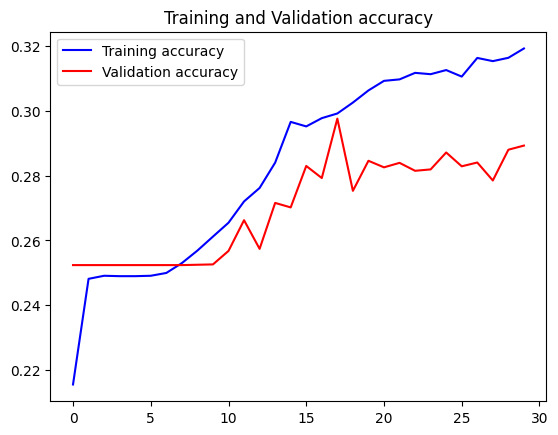

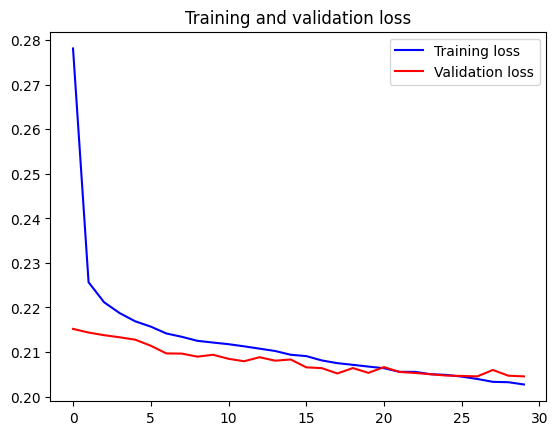

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()